## Homework 2

## Plot Data

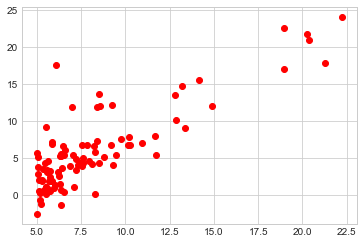

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-whitegrid')
import numpy as np

df = pd.read_csv("data2.txt", header=None)
df.columns = ['col1', 'col2']

X = df.loc[:, ['col1']] 
y = df.loc[:, ['col2']]


plt.plot(X,y,'ro')

## Normal Equation

In [116]:
# Add new column having value 1 in col1. This is needed for dot product
X_updated = np.c_[np.ones((len(X),1)),X]
# Apply Normal Equation -> w=(X^T∙X)^(-1)∙X^T∙y
coefficients = np.linalg.inv(X_updated.T.dot(X_updated)).dot(X_updated.T).dot(y)
  
print(coefficients) # Coefficients

[[-3.89578088]
 [ 1.19303364]]


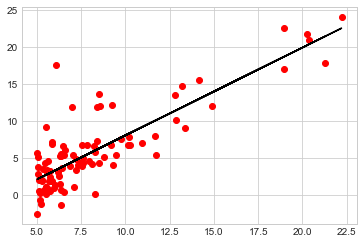

In [117]:
y_predict_value = X_updated.dot(coefficients)

plt.plot(X,y,'ro')
plt.plot(X,y_predict_value,'black')

### We have calculated coefficients using Normal Equation and then plot the data based on predicted value of y(col2) using cofficients

## Gradient Descent - Batch Mode

#### Split dataset into training and testing set

In [118]:
from sklearn.model_selection import train_test_split
print (np.shape(X))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
print (np.shape(X_train))
print (np.shape(y_train))

(97, 1)
(77, 1)
(77, 1)


#### Calculate Cofficients using Gradient Descent

In [119]:
def calculate_gradient_descent_batch(X, y, cofficients, learning_rate, iterations):
    samples = len(y_train)
    X_updated = np.c_[np.ones((len(X),1)),X]
    mse = []
    cofficients_array = []
    
    for i in range(iterations):
        grad = (2/samples) * X_updated.T.dot(X_updated.dot(cofficients) - y)
        cofficients = cofficients - (learning_rate * grad)
        y_predict = X_updated.dot(cofficients)
        mse_value = mean_squared_error(y_predict, y);
        #mse_value = (1/samples) * np.sum(np.square(y_predict-y))
        mse.append(mse_value)
        cofficients_array.append(cofficients)

    return cofficients, mse, cofficients_array

In [120]:
iterations = 1000
learning_rate = 0.001
cofficients = np.random.randn(2,1)
mse_batch_train = []

cofficients, mse_batch_train, cofficients_array = calculate_gradient_descent_batch(X_train, y_train, cofficients, learning_rate, iterations)
batch_cofficients = cofficients_array;
print (cofficients)

[[-0.36984339]
 [ 0.82437174]]


#### Plot MSE vs Iterations for Training and Testing Set (Batch Mode)

In [126]:
print (np.shape(batch_cofficients[0]))

(2, 1)


In [95]:
mse_batch_test = []
X_test_updated = np.c_[np.ones((len(X_test),1)),X_test]
for i in range(iterations):
    
        y_predict = X_test_updated.dot(batch_cofficients[i])
        #print(np.shape(y_predict))
        mse_value = mean_squared_error(y_predict, y_test);
        #mse_value = (1/samples) * np.sum(np.square(y_predict-y))
        mse_batch_test.append(mse_value)

TypeError: Input z must be 2D, not 0D

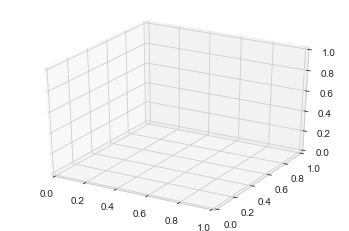

In [122]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(batch_cofficients[, mse_batch_train, 50, cmap='binary')
#plt.plot(batch_cofficients, mse_batch_train)

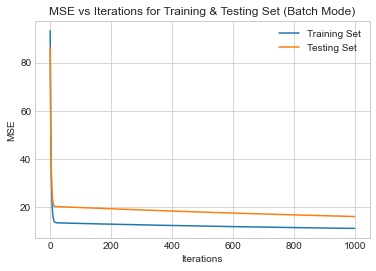

In [96]:
plt.plot(range(iterations), mse_batch_train)
plt.plot(range(iterations), mse_batch_test)
labels = ["Training Set", "Testing Set"]
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title("MSE vs Iterations for Training & Testing Set (Batch Mode)")
plt.legend(labels)
plt.show()

### zoom out to see difference

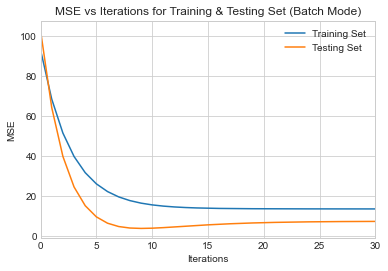

In [97]:
plt.plot(range(iterations), mse_batch_train)
plt.plot(range(iterations), mse_test)
labels = ["Training Set", "Testing Set"]
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xlim(0, 30)
plt.title("MSE vs Iterations for Training & Testing Set (Batch Mode)")
plt.legend(labels)
plt.show()

#### As we can see, that for testing set, mse is increasing after its minimum value, which shows overfitting condition with increasing number of iterations

#### Plot MSE vs Iterations for different Learning Rate

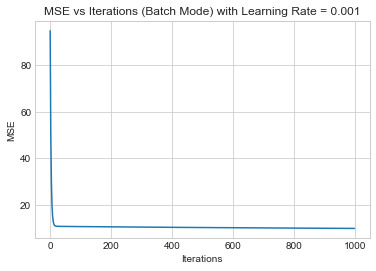

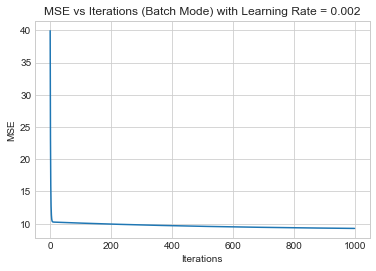

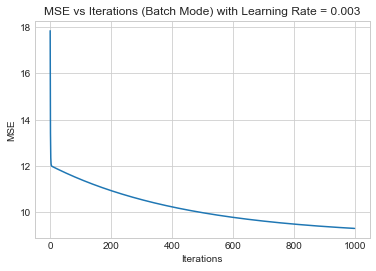

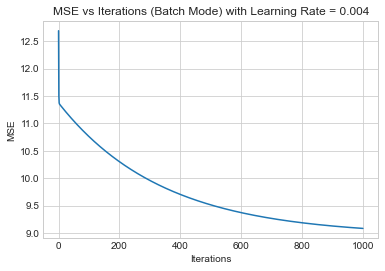

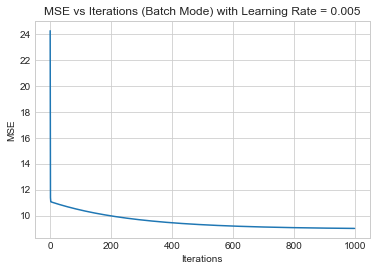

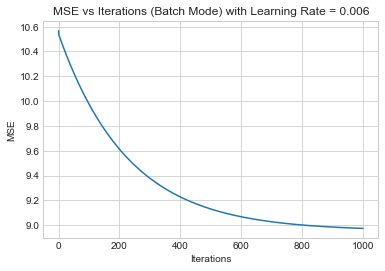

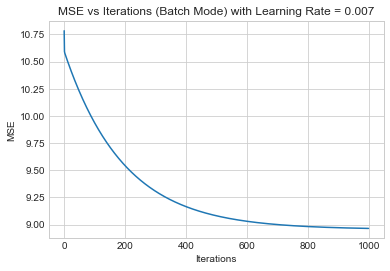

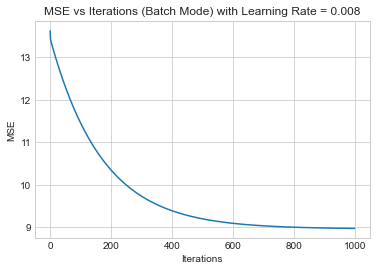

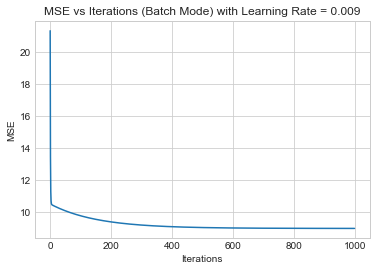

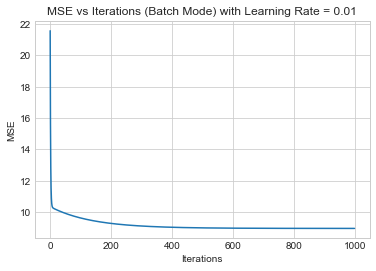

In [98]:
iterations = 1000
learning_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cofficients = np.random.randn(2,1)

for l in learning_rate:
    
    cofficients = np.random.randn(2,1)
    cofficients, mse_batch, cofficients_array = calculate_gradient_descent_batch(X_train, y_train, cofficients, l, iterations)
    
    plt.plot(range(iterations), mse_batch)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title("MSE vs Iterations (Batch Mode) with Learning Rate = "+str(l))
    plt.show()
    

### Zooming out to see the difference

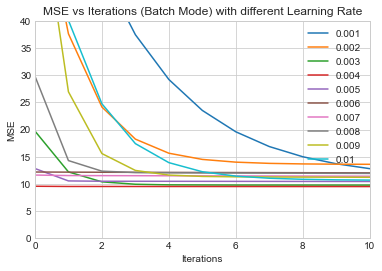

In [99]:
#Zooming out to see the difference
for l in learning_rate:
    
    cofficients = np.random.randn(2,1)
    cofficients, mse_batch, coffiicents_array = calculate_gradient_descent_batch(X_train, y_train, cofficients, l, iterations)
    
    plt.plot(range(iterations), mse_batch)
    
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xlim(0,10)
plt.ylim(0,40)
plt.legend(learning_rate)
plt.title("MSE vs Iterations (Batch Mode) with different Learning Rate")
plt.show()

#### As we can observe above plot for different learning rate along with different number of iterations, we can see below points - 
- For learning rate = 0.001 which is the smallest, algorithm will reach to the optimum solution but it will take longer time.
- In each iteration, it will reach towards its global minima and hence eventually, it will reach to its optimum solution
- When learning rate is too high, it will jump to its minima faster and sometimes show abrubt solution
- Learning Rate = 0.002 or 0.003 will be the best solution for this case as algorithm is slowly approaching to its optimal solution
- As we can see, that for testing set, mse is increasing after its minimum value, which shows overfitting condition with increasing number of iterations
- In terms of Accuracy and convergence rate,after some iterations, mse will converge to specific value and won't change further which means that it reached optimal solution. 
- In this case, after iterations near to 10, mse will converge and won't change
- Lower MSE is near to 10 which indicates minima. hence we can use this as threshold value for finding minima in Stochastic Mode.

## Gradient Descent - Stochastic Mode

#### Calculate Cofficients using Gradient Descent

In [110]:

def calculate_gradient_descent_stochastic(X, y, cofficients, learning_rate, iterations):
    
    samples = len(y_train)
    X_updated = np.c_[np.ones((len(X),1)),X]
    mse = []
    cofficients_array = []
    mse_value = 0.0
    while mse_value >= 10:
        for j in range(samples):
            random_loc = np.random.randint(0,samples)
            X_sample = X_updated[random_loc:random_loc+1]
            y_sample = y[random_loc:random_loc+1]
            y_predict = np.dot(X_sample,cofficients)
            
            grad = 2 * X_sample.T.dot(y_predict - y_sample)
            learning_rate = learning_schedule(iterations * len(y) + j)
            cofficients = cofficients - (learning_rate * grad)
            cofficients_array.append(cofficients)
            y_predict = X_updated.dot(cofficients)
        mse_value = mean_squared_error(y_predict, y);
        mse.append(mse_value)     
    
    return cofficients, mse, cofficients_array

In [113]:
iterations = 50
learning_rate = 0.001
cofficients = np.random.randn(2,1)
mse_stochastic_train = []
mse_stochastic_test = []

cofficients, mse_stochastic_train, stochastic_cofficients = calculate_gradient_descent_stochastic(X_train, y_train, cofficients, learning_rate, iterations)
print (cofficients)
samples = len(y_train)
#Prediction for Testing Set using calculated cofficients above
X_test_updated = np.c_[np.ones((len(X_test),1)),X_test]
for i in range(samples):
    
    y_predict = X_test_updated.dot(stochastic_cofficients[i])
    mse_value = mean_squared_error(y_predict, y_test);
    #mse_value = (1/samples) * np.sum(np.square(y_predict-y))
    mse_stochastic_test.append(mse_value)


[[-0.28055494]
 [-0.21532806]]


IndexError: list index out of range

#### Plot MSE vs Iterations for Training & Testing Set (Stochastic Mode)


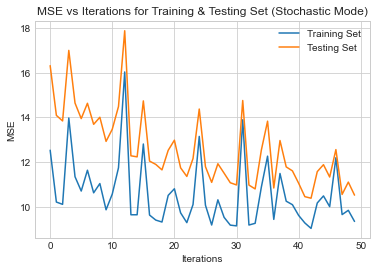

In [104]:
plt.plot(range(iterations), mse_stochastic_train)
plt.plot(range(iterations), mse_stochastic_test)
labels = ["Training Set", "Testing Set"]
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title("MSE vs Iterations for Training & Testing Set (Stochastic Mode)")
plt.legend(labels)
plt.show()

#### Plot MSE vs Iterations for different Learning Rate

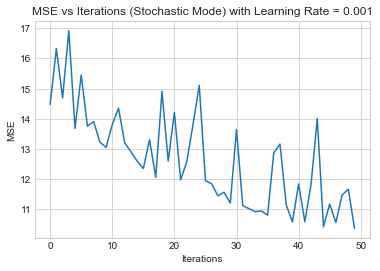

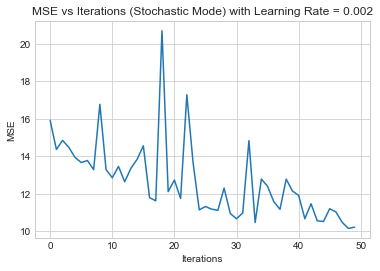

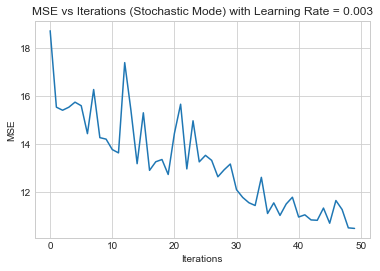

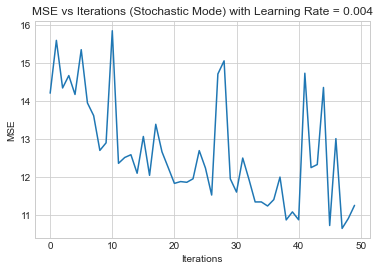

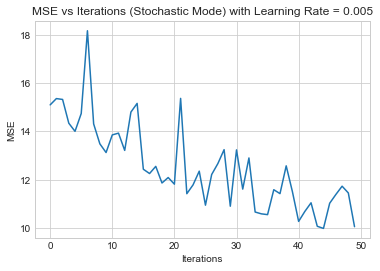

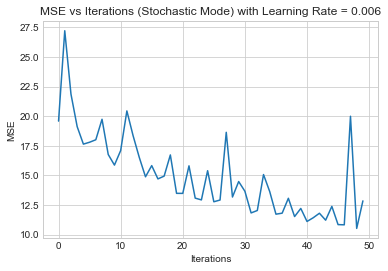

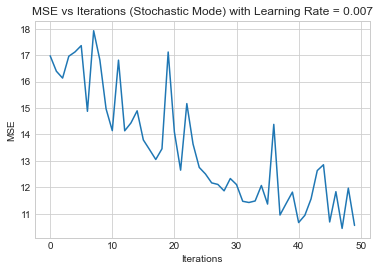

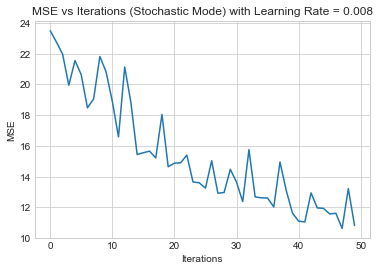

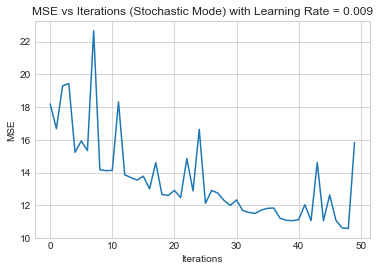

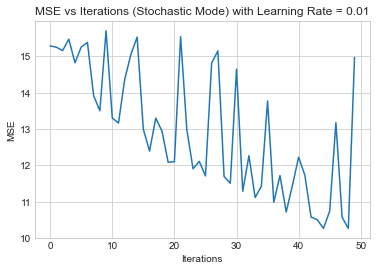

In [105]:
iterations = 50
learning_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cofficients = np.random.randn(2,1)

for l in learning_rate:
    
    cofficients = np.random.randn(2,1)
    mse_stochastic_test = []
    cofficients, mse_stochastic, stochastic_cofficients = calculate_gradient_descent_stochastic(X_train, y_train, cofficients, l, iterations)
    #Prediction for Testing Set using calculated cofficients above
    X_test_updated = np.c_[np.ones((len(X_test),1)),X_test]
    for i in range(iterations):
    
        y_predict = X_test_updated.dot(stochastic_cofficients[i])
        mse_value = mean_squared_error(y_predict, y_test);
        #mse_value = (1/samples) * np.sum(np.square(y_predict-y))
        mse_stochastic_test.append(mse_value)
        
    plt.plot(range(50), mse_stochastic_test)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title("MSE vs Iterations (Stochastic Mode) with Learning Rate = "+str(l))
    plt.show()


### Zooming out to see the difference

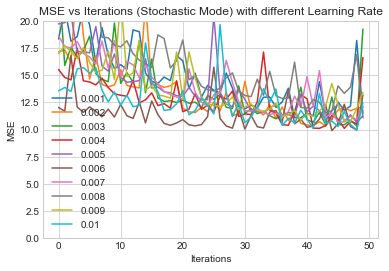

In [107]:
#Zooming out to see the difference
for l in learning_rate:
    mse_stochastic_test = []
    cofficients = np.random.randn(2,1)
    cofficients, mse_stochastic, stochastic_cofficients = calculate_gradient_descent_stochastic(X_train, y_train, cofficients, l, iterations)
    
    #Prediction for Testing Set using calculated cofficients above
    X_test_updated = np.c_[np.ones((len(X_test),1)),X_test]
    for i in range(iterations):
    
        y_predict = X_test_updated.dot(stochastic_cofficients[i])
        mse_value = mean_squared_error(y_predict, y_test);
        #mse_value = (1/samples) * np.sum(np.square(y_predict-y))
        mse_stochastic_test.append(mse_value)
    plt.plot(range(iterations), mse_stochastic_test)
    
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.ylim(0,20)
plt.legend(learning_rate)
plt.title("MSE vs Iterations (Stochastic Mode) with different Learning Rate")
plt.show()

#### As we can observe above plot for different learning rate along with different number of iterations, we can see below points - 
- For learning rate = 0.001 which is the smallest, we can observe too many spikes in the plot.
- In each iteration, it will pick some random sample from input and calculate gradient and hence, it is faster than batch mode
- MSE value will bounce up and down since we are using random sample from the input and hence, in above plot, we can observe spikeds at different iterations level
- When learning rate is too high, it is showing less spikes
- With increasing learning rate, it will reach minima faster, but when learning rate is too high, MSE will show large increase value.